# 特征工程训练
## 特征工程：
    - 特征排序：通过递归特征消除，获取鸢尾花数据集特征排名

导入需求的库：

In [1]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

读取数据：鸢尾花数据集

In [2]:
iris = load_iris()

In [14]:
selector = RFE(estimator=LogisticRegression(), n_features_to_select=1).fit(iris.data, iris.target)
data = selector.transform(iris.data)
print(data[0:5])
print(selector.ranking_)

[[1.4]
 [1.4]
 [1.3]
 [1.5]
 [1.4]]
[4 3 1 2]


> 总结：<br>
  递归特征消除原理为：进⾏⼤规模实验，进⾏递归特征消除，返回特征选择后的数据。递归消除特征法使⽤⼀个基模型来进⾏多轮训练，每轮训练后，消除若⼲权值系数的特征，再基于新的特征集进⾏下⼀轮训练。这里选用的RFE来实现该功能，基模型为逻辑回归模型，最终特征数选为1是为了最终排序结果可以设计到每一个特征项。<br>
  缺点：需进行多次模型训练，时间及运行代价过大

## 数据可视化
- 通过matlpotlib绘制$ y = x^3 +10$函数

In [18]:
import matplotlib.pyplot as plt
import numpy as np

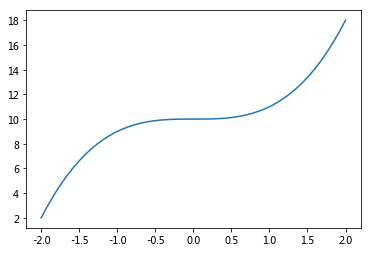

In [19]:
x = np.linspace(-2,2,50)
y = x ** 3 + 10
plt.plot(x,y)

- 绘制散点图

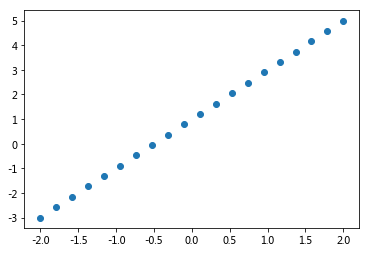

In [21]:
X = np.linspace(-2, 2, 20)
Y = 2 * X + 1
plt.scatter(X, Y)

## 使⽤鸢尾花数据集
   - 分析4个特征统计信息和状况
   - 通过最近邻（KNN）分类器,设置k = 5。预测花种类，尝试使⽤特征扩展或特征选择⽅式提升预测评分

读取数据并查看数据统计信息和状况

In [111]:
iris = load_iris()
X = iris.data#特征数据
y = iris.target#数据标签
print(f'数据分布: \n {iris.DESCR}')

数据分布: 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===

数据分析：该数据集合共有150组信息，4种特征，三个类别（每种类别各占50条信息），无空值，且通过数据统计中可以得到，特征“petal length”和“petal width”与类别相关度比较高。

进行训练和测试，这里使用KNN算法，邻居参数设置为5，因为该数据集数据比较少，所以用到了交叉验证集，从而得到的准确率更加可信。

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('准确率为：{:.4f}%'.format(np.mean(scores)*100))

准确率为：97.3333%


为了让准确率进一步提升下面考虑进行特征选择和特征扩展：<br>
- 特征选择： 在1.1特征工程中我们已经得知该数据集特征排名为[4 3 1 2]，因此选择后三个特征进行训练试一试

In [124]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X[:,-3:], y, cv=5, scoring='accuracy')
print('准确率为：{:.4f}%'.format(np.mean(scores)*100))

准确率为：96.6667%


事实证明结果并不如使用四个特征进行训练的效果

- 特征扩展：由于最后两列特征的重要性更好一些，以此加一组新的特征为最后两个特征的均值

In [121]:
import pandas as pd

df = pd.DataFrame(X,columns=['E1','E2','E3','E4'])
f1index = df.columns.get_loc('E3')
f2index = df.columns.get_loc('E4')
df['E5'] = df.apply(lambda x: (x[f1index]+ x[f2index])/2, axis=1)
X_1 = np.array(df)

In [125]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_1, y, cv=5, scoring='accuracy')
print('准确率为：{:.4f}%'.format(np.mean(scores)*100))

准确率为：97.3333%


增加一组特征后和原始特征的效果基本保持一直，在加一组后三列均值的特征尝试一下

In [127]:
df = pd.DataFrame(X,columns=['E1','E2','E3','E4'])
f1index = df.columns.get_loc('E2')
f2index = df.columns.get_loc('E3')
f3index = df.columns.get_loc('E4')
df['E5'] = df.apply(lambda x: (x[f2index]+ x[f3index])/2, axis=1)
df['E6'] = df.apply(lambda x: (x[f1index] + x[f2index] + x[f3index])/3, axis=1)
X_2 = np.array(df)

In [128]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_2, y, cv=5, scoring='accuracy')
print('准确率为：{:.4f}%'.format(np.mean(scores)*100))

准确率为：96.6667%


结论：再增加特征效果反而下降了，说明原始特征表现的结果还是不错的。但由于特征选x和扩展的存在的可能不计其数，也许会存在更好的情况。

# 泰坦尼克Titanic 求⽣预测
> **题⽬描述**:<br>
本项⽬中需要利⽤监督学习算法对于Titanic获救概率进⾏分析。
通过对于性别、年龄等研究对于获救概率产⽣的影响。

## 数据读取与分析
PassengerId => 乘客ID    
Survived => 获救情况（1为获救，0为未获救）  
Pclass => 乘客等级(1/2/3等舱位)<br> 
Name => 乘客姓名     
Sex => 性别     
Age => 年龄     
SibSp => 堂兄弟/妹个数     
Parch => 父母与小孩个数<br> 
Ticket => 船票信息     
Fare => 票价     
Cabin => 客舱     
Embarked => 登船港口

In [510]:
data_train = pd.read_csv("data/train.csv")
print('数据列名：', '\n',data_train.columns)
print('训练集每列性质，空值和类型:')
print(data_train.info())
data_test = pd.read_csv("data/test.csv")
print('测试集每列性质，空值和类型:')
print(data_test.info())

数据列名： 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
训练集每列性质，空值和类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
测试集每列性质，空值和类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex        

>数据状况：训练集有数据891条，其中Age和Cabin存在缺失值；测试集有数据418条，其中Age和Cabin依旧存在缺失值

## 数据类型分析
接下来要分析数据类型，进行预测需要进行数学计算，而object类型是无法进行运算的，因此我们需要先观察统计一下object类型数据的具体情况

In [511]:
data = data_train.values
print('训练集数据：')
for idx, itr in enumerate(data_train.dtypes):
    if itr == np.object:
        print("第%d列不重复字符类个数："%idx, len(set(data[:, idx])))
data = data_test.values
print('测试集数据：')
for idx, itr in enumerate(data_test.dtypes):
    if itr == np.object:
        print("第%d列不重复字符类个数："%idx, len(set(data[:, idx])))

训练集数据：
第3列不重复字符类个数： 891
第4列不重复字符类个数： 2
第8列不重复字符类个数： 681
第10列不重复字符类个数： 148
第11列不重复字符类个数： 4
测试集数据：
第2列不重复字符类个数： 418
第3列不重复字符类个数： 2
第7列不重复字符类个数： 363
第9列不重复字符类个数： 77
第10列不重复字符类个数： 3


>很明显一些列中包含的字符类比较多，对于这些数据而言是不适合做分类算法的，因此需要将其剔除在一些算法中是可以容忍类似数据的。<br>
因此，Name和Ticket这两种特征应该被剔除出去。对于PassengerID是一个连续数据，只是一个ID对实际预测起不到正向影响也应该一同删除。

In [512]:
data_train.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)
data_test.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

In [513]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [514]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


## 空值处理
前文已经得出：Age和Cabin两个特征类别存在比较多的空值，需要进行处理<br>
对于年龄（Age）特征的空值，我们通过建立模型，通过已知的年龄数据进行训练，去预测未知年龄。这里年龄即为标签，而数据选取为'Fare', 'Parch', 'SibSp', 'Pclass'。<br>
对于客舱（Cabin）特征的空值，由于缺失的过多，而且通过生活经验判读该特征与其余特征的关联度不大，因此不能用上面的模型预测方法，而是直接将其置为两种类别：已知与未知。

In [515]:
def set_missing_ages(df):
    # 引入随机森林模型
    from sklearn.ensemble import RandomForestRegressor
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges

    return df


def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df

>在这里出现了一个小插曲：对训练集进行年龄空置预测时非常顺利，但在测试集年龄空置预测时，出现了报错“Input contains NaN, infinity or a value too large for dtype('float32').”。发现特征中有空置存在，回过头看测试集信息时发现“Fare           417 non-null float64”，说明Fare特征下存在一个空值，因此将这个空值设置为票价的均值。

In [516]:
data_train = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_test.loc[(data_test.Fare.isnull()),'Fare'] = data_test.Fare.mean() 
data_test = set_Cabin_type(data_test)
data_test = set_missing_ages(data_test)
data_train.to_csv("data_noNan.csv")

In [517]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No,S
1,1,1,female,38.0,1,0,71.2833,Yes,C
2,1,3,female,26.0,0,0,7.9250,No,S
3,1,1,female,35.0,1,0,53.1000,Yes,S
4,0,3,male,35.0,0,0,8.0500,No,S


In [518]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,No,Q
1,3,female,47.0,1,0,7.0000,No,S
2,2,male,62.0,0,0,9.6875,No,Q
3,3,male,27.0,0,0,8.6625,No,S
4,3,female,22.0,1,1,12.2875,No,S


## 类目型的特征离散/因子化
因为逻辑回归建模时，需要输入的特征都是数值型特征<br>
我们先对类目型的特征离散/因子化<br>
以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性<br>
原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0<br>
原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1<br>
我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示<br>
处理categorical feature：一般就是通过dummy variable的方式解决，也叫one hot encode，可以通过pandas.get_dummies()或者 
sklearn中preprocessing.OneHotEncoder(), 本例子选用pandas的get_dummies()

In [519]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')
label_train = pd.get_dummies(data_train['Survived'], prefix= 'Survived')
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Survived','Pclass','Sex','Cabin', 'Embarked'], axis= 1, inplace= True)
label_train.head()

,Survived_0,Survived_1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [520]:
data_train_fixed = df
data_train_fixed.head()

,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


## 无量纲化
通过data_train_fixed.describe()可以看出：<br>
除年龄（Age）、堂兄弟/妹个数（Slbsp）、父母与小孩个数（Parch）和票价（Fare）特征外，其余特征均为0或1。为达到统一的标准，需要对年龄和票价特征进行归一化处理。<br>

In [521]:
data_train_fixed.describe()

,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.647248,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.722783,0.352413,0.647587,0.242424,0.206510,0.551066
std,13.629879,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.447876,0.477990,0.477990,0.428790,0.405028,0.497665
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


其次先观察一下这四组数据的分布情况，分别如下：

<function matplotlib.pyplot.show(*args, **kw)>

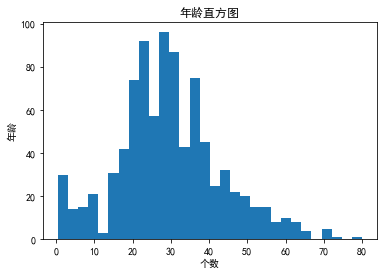

In [522]:
y = np.array(df['Age'])
plt.hist(y, bins=30)
plt.xlabel('个数')
plt.ylabel('年龄')
plt.title('年龄直方图')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

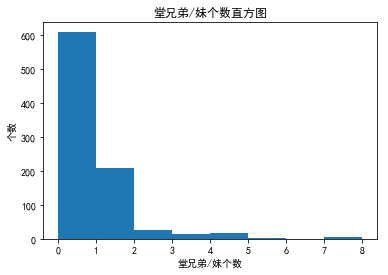

In [523]:
y = np.array(df['SibSp'])
plt.hist(y, bins=8)
plt.xlabel('堂兄弟/妹个数')
plt.ylabel('个数')
plt.title('堂兄弟/妹个数直方图')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

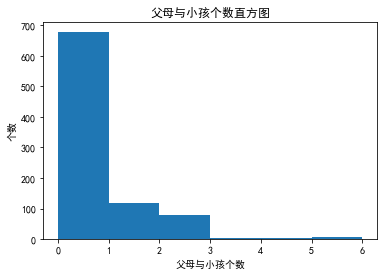

In [524]:
y = np.array(df['Parch'])
plt.hist(y, bins=6)
plt.xlabel('父母与小孩个数')
plt.ylabel('个数')
plt.title('父母与小孩个数直方图')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

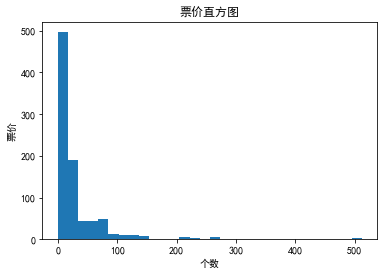

In [525]:
y = np.array(df['Fare'])
plt.hist(y,bins=30)
plt.xlabel('个数')
plt.ylabel('票价')
plt.title('票价直方图')
plt.show

可以看出，年龄是按照正态分布的，而其余三类基于泊松分布<br>
根据[参考博客](https://blog.csdn.net/program_developer/article/details/78637711 "机器学习-数据归一化方法（Normalization Method）")的理论，这里选用了0均值标准化（Z-score standardization）的方法。具体使用了sklearn中preprocessing库里面的scale函数。

In [526]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train_fixed[['Age','Fare','SibSp','Parch']])
temp = scaler.transform(data_train_fixed[['Age','Fare','SibSp','Parch']])
temp = pd.DataFrame(temp, columns=['Age_scalered','Fare_scalered','SibSp_scalered','Parch_scalered'])
temp.head()

,Age_scalered,Fare_scalered,SibSp_scalered,Parch_scalered
0,-0.561380,-0.502445,0.432793,-0.473674
1,0.613171,0.786845,0.432793,-0.473674
2,-0.267742,-0.488854,-0.474545,-0.473674
3,0.392942,0.420730,0.432793,-0.473674
4,0.392942,-0.486337,-0.474545,-0.473674


In [527]:
data_train_fixed.drop(['Age','Fare','SibSp','Parch'], axis= 1, inplace= True)
data_train_fixed.head()

,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,0,1,0,1,0,0,1
1,0,1,1,0,0,1,0,1,0,0
2,1,0,0,0,1,1,0,0,0,1
3,0,1,0,0,1,1,0,1,0,0
4,1,0,0,0,1,0,1,0,0,1


In [528]:
data_train_scalered = pd.concat([data_train_fixed, temp], axis=1)
data_train_scalered.head()

,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scalered,Fare_scalered,SibSp_scalered,Parch_scalered
0,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445,0.432793,-0.473674
1,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845,0.432793,-0.473674
2,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854,-0.474545,-0.473674
3,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730,0.432793,-0.473674
4,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337,-0.474545,-0.473674


## 预测模型
- KNN <br>
首先使用knn进行预测（n = 5，并使用交叉验证集）

In [529]:
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    if plot:
        plt.figure(figsize=(12,5), dpi=600)
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数training samples num")
        plt.ylabel(u"得分score")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分score over train data set")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"测试集上得分score over test data set")

        plt.legend(loc=0)

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

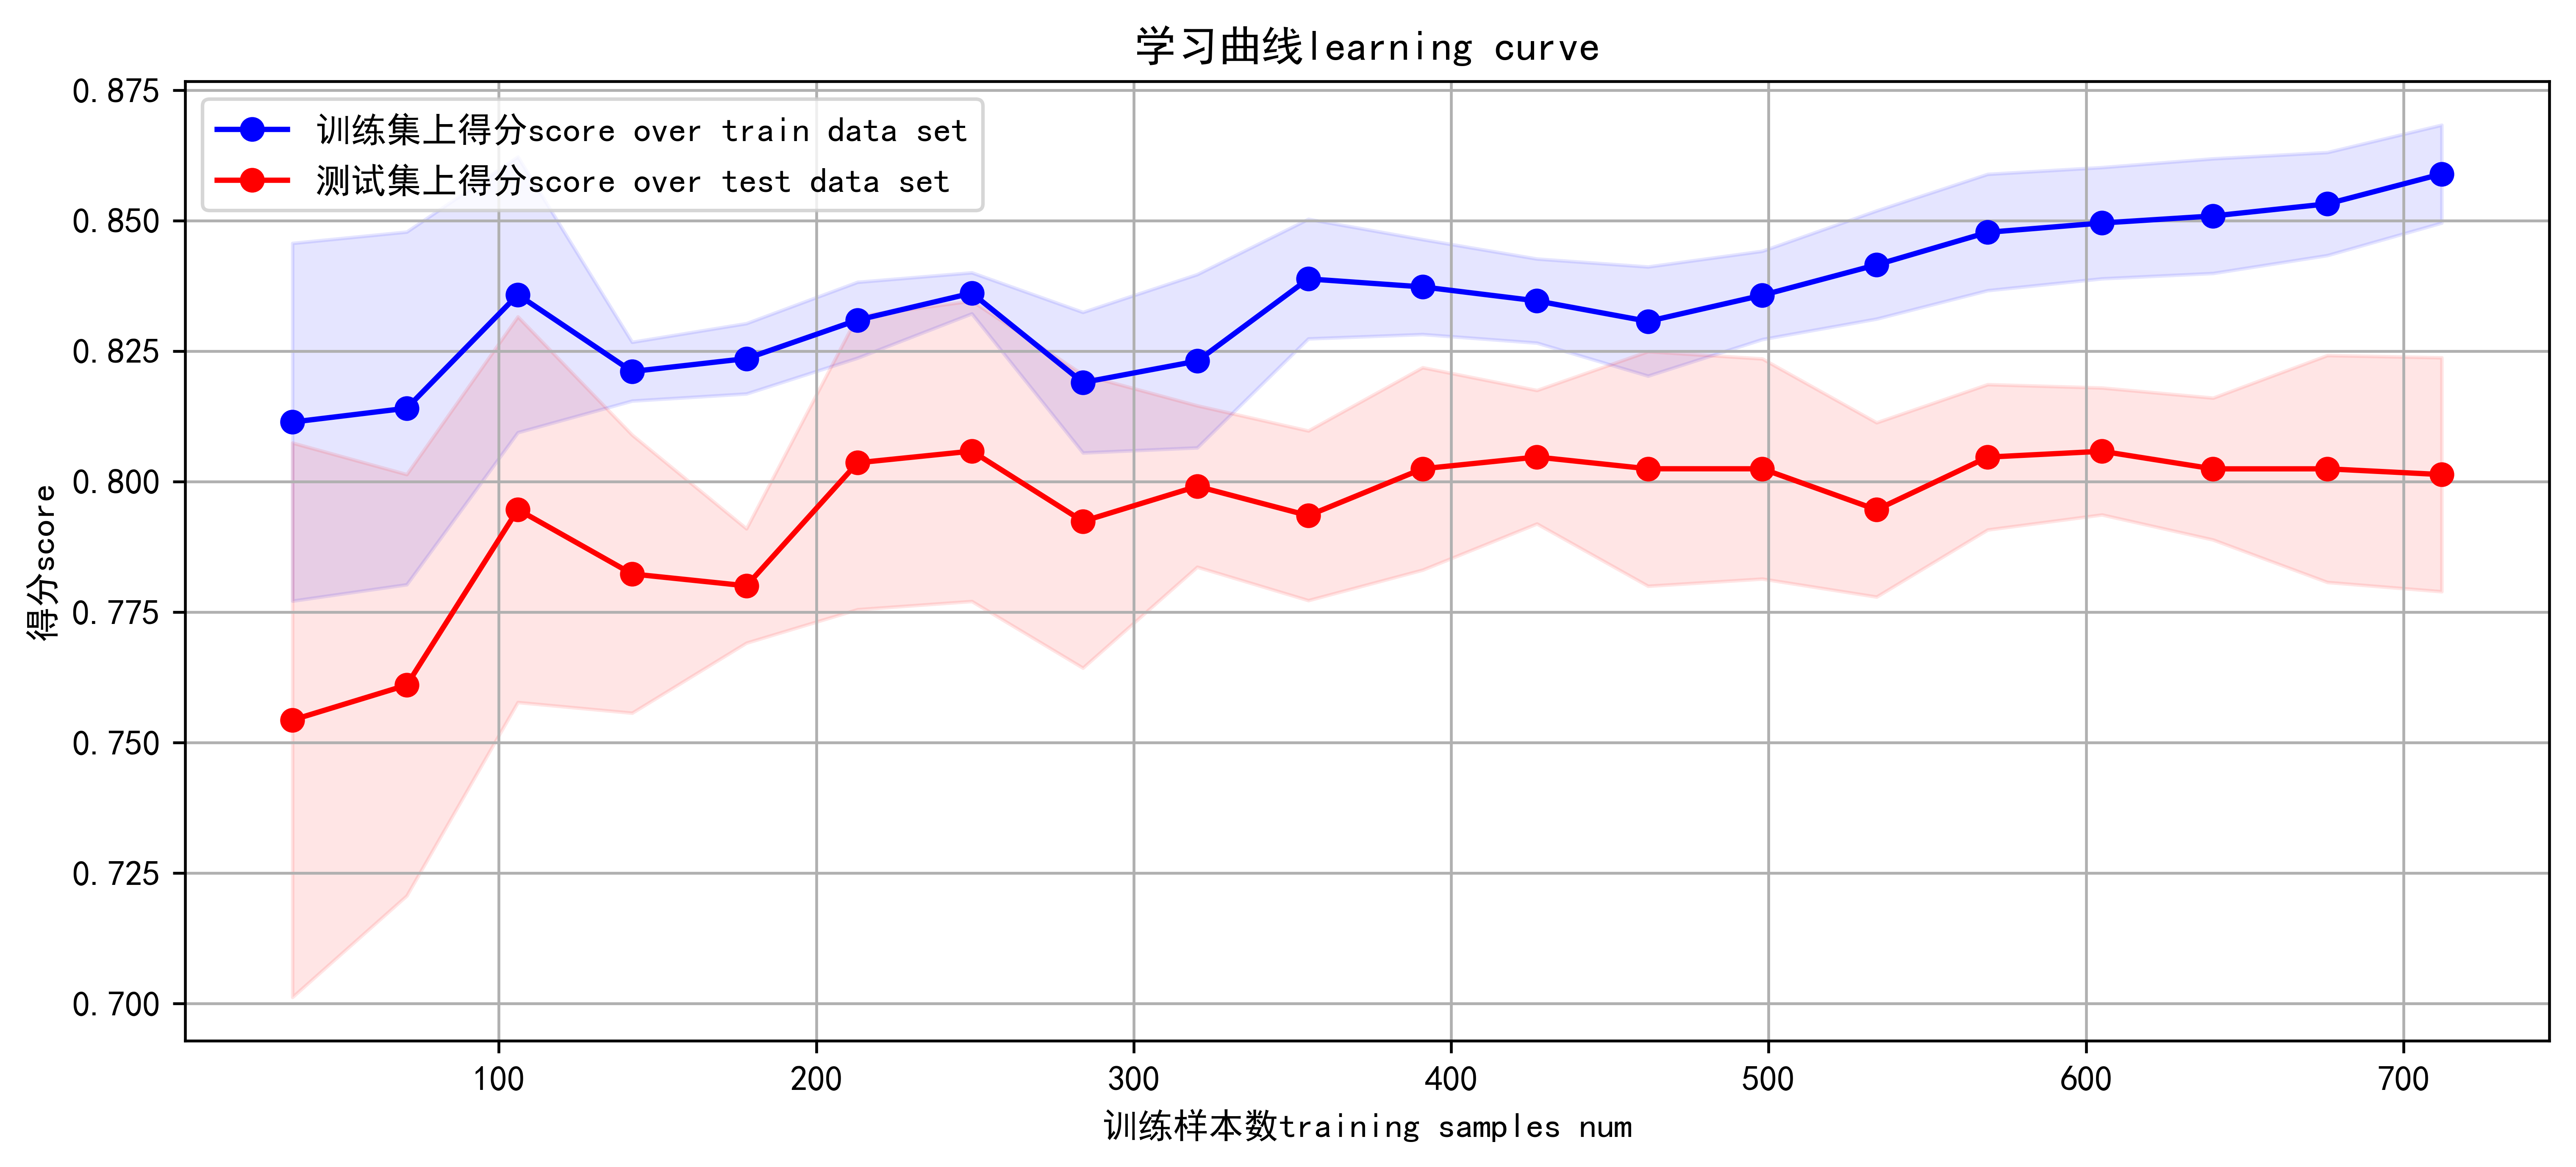

最终训练集和测试集准确率的均值为 82.37%, 最大差值为：8.94%


In [530]:
from sklearn.neighbors import KNeighborsClassifier

# 首先将数据和标签转换为矩阵，便于计算
X = data_train_scalered.as_matrix()
y = label_train.as_matrix()
knn = KNeighborsClassifier(n_neighbors=5)
midpoint, diff = plot_learning_curve(knn, u"学习曲线learning curve", X, y,cv=5)
print('最终训练集和测试集准确率的均值为 {:.2f}%, 最大差值为：{:.2f}%'.format(midpoint*100, diff*100))

> 结论：可以看出使用KNN的模型最后的准确率平均为82.37%，最大差值为8.94%，说明有些过拟合的情况存在

- 决策树<br>
    使用到的是sklearn.tree中的DecisionTreeClassifier

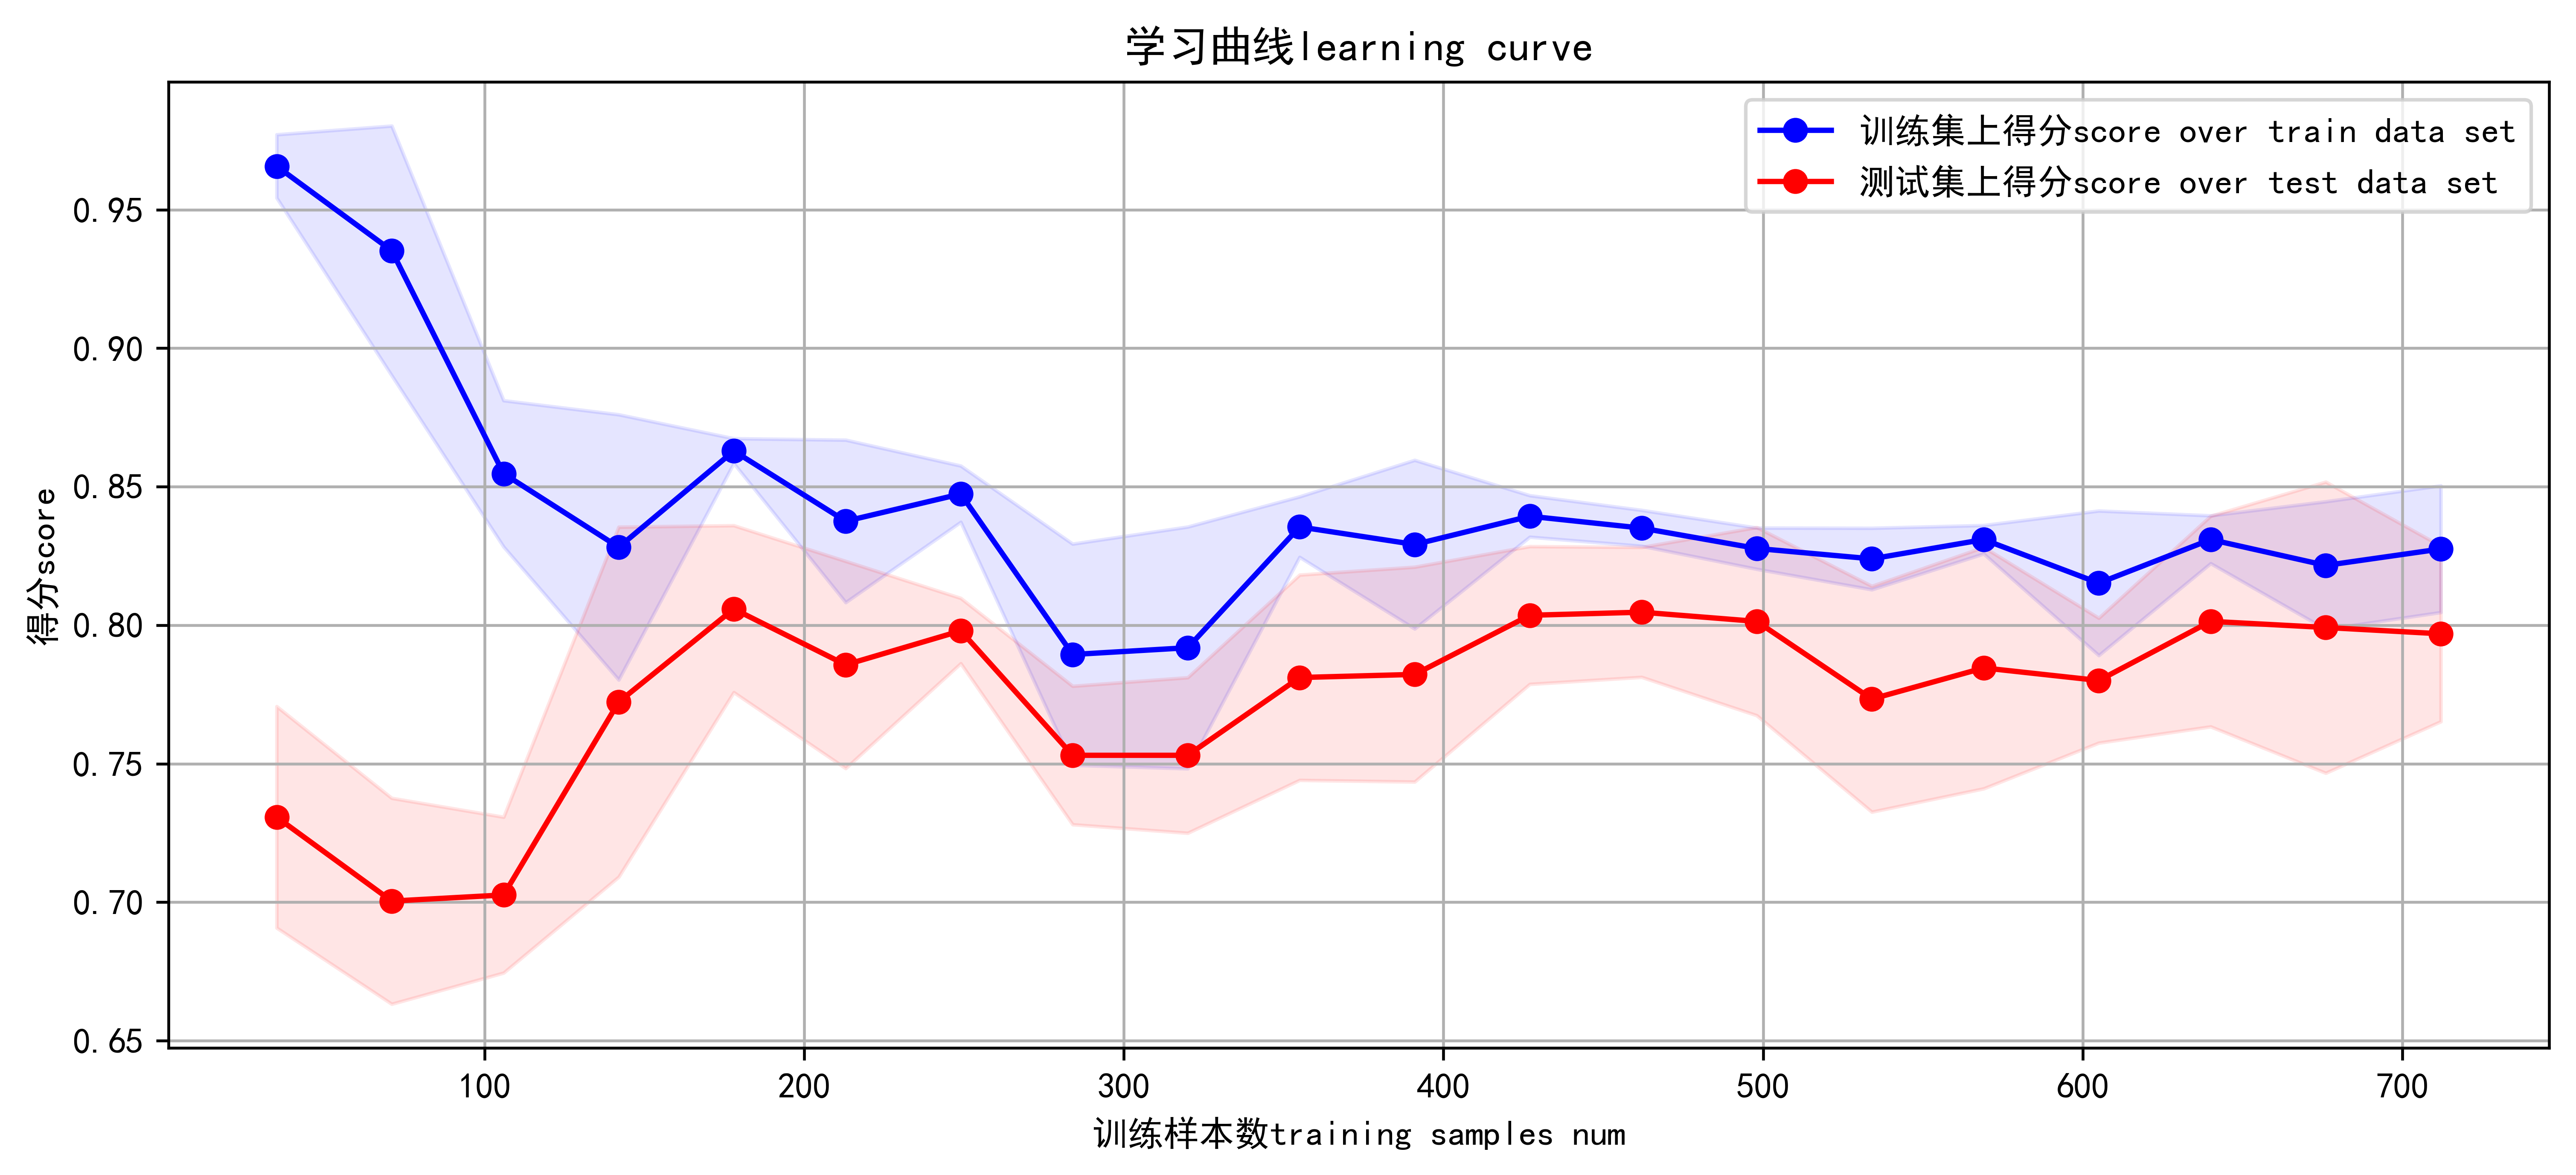

最终训练集和测试集准确率的均值为 80.78%, 最大差值为：8.52%


In [531]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
midpoint, diff = plot_learning_curve(clf, u"学习曲线learning curve", X, y,cv=5)
print('最终训练集和测试集准确率的均值为 {:.2f}%, 最大差值为：{:.2f}%'.format(midpoint*100, diff*100))

>结论：对比KNN模型，决策树的效果略差，准确率低了2个百分点，而差值变化不大，意味着过拟合依然存在

## 拓展
在数据预处理中没有考虑到标签均衡的问题，这里将标签均衡后在进行一下测试

- 首先观察数据标签是否均衡

In [555]:
data_train_noNan = pd.read_csv('data_noNan.csv')
print("看类别平衡的状况\n", data_train_noNan['Survived'].value_counts())

看类别平衡的状况
 0    549
1    342
Name: Survived, dtype: int64


In [556]:
data_train_noNan.drop(['Unnamed: 0'], axis= 1, inplace= True)
data_train_noNan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No,S
1,1,1,female,38.0,1,0,71.2833,Yes,C
2,1,3,female,26.0,0,0,7.9250,No,S
3,1,1,female,35.0,1,0,53.1000,Yes,S
4,0,3,male,35.0,0,0,8.0500,No,S


- 可以看出标签并不均衡，为了使预测准确度更好，应该使标签尽可能的均衡<br>
    这里由于数据量不多，应该采用upsample/SMOTE造类似少量数据类别相似的假数据

In [557]:
from sklearn.utils import resample

df_majority = data_train_noNan[data_train_noNan.Survived==0]
df_minority = data_train_noNan[data_train_noNan.Survived==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=(len(df_majority) - len(df_minority)),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority],ignore_index=True)
print(df_upsampled.columns) 
print(df_upsampled['Survived'].value_counts())

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')
1    549
0    549
Name: Survived, dtype: int64


均衡标签后在检查一下新数据中是否存在空置

In [558]:
df_upsampled.count()

Survived    1098
Pclass      1098
Sex         1098
Age         1098
SibSp       1098
Parch       1098
Fare        1098
Cabin       1098
Embarked    1095
dtype: int64

>发现：“Embarked”中存在3个空置，由于数量比较少，直接舍弃对结果的影响也不会很大

In [559]:
data_train_balance = df_upsampled.loc[(df_upsampled.Embarked.notnull()),:]
data_train_balance.reset_index(drop=True, inplace=True)
data_train_balance.count()

Survived    1095
Pclass      1095
Sex         1095
Age         1095
SibSp       1095
Parch       1095
Fare        1095
Cabin       1095
Embarked    1095
dtype: int64

- 类目型的特征离散/因子化

In [560]:
dummies_Cabin = pd.get_dummies(data_train_balance['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_train_balance['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_train_balance['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_train_balance['Pclass'], prefix= 'Pclass')
label_train = pd.get_dummies(data_train_balance['Survived'], prefix= 'Survived')
df = pd.concat([data_train_balance, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Survived','Pclass','Sex','Cabin', 'Embarked'], axis= 1, inplace= True)
label_train.head()

,Survived_0,Survived_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


- 再进行一下上述的出模型训练

In [561]:
# 数据归一化
data_train_balance  = df
scaler.fit(data_train_balance[['Age','Fare','SibSp','Parch']])
temp = scaler.transform(data_train_balance[['Age','Fare','SibSp','Parch']])
temp = pd.DataFrame(temp, columns=['Age_scalered','Fare_scalered','SibSp_scalered','Parch_scalered'])
data_train_balance.drop(['Age','Fare','SibSp','Parch'], axis= 1, inplace= True)
data_train_balanced = pd.concat([data_train_balance, temp], axis=1)

   1. KNN

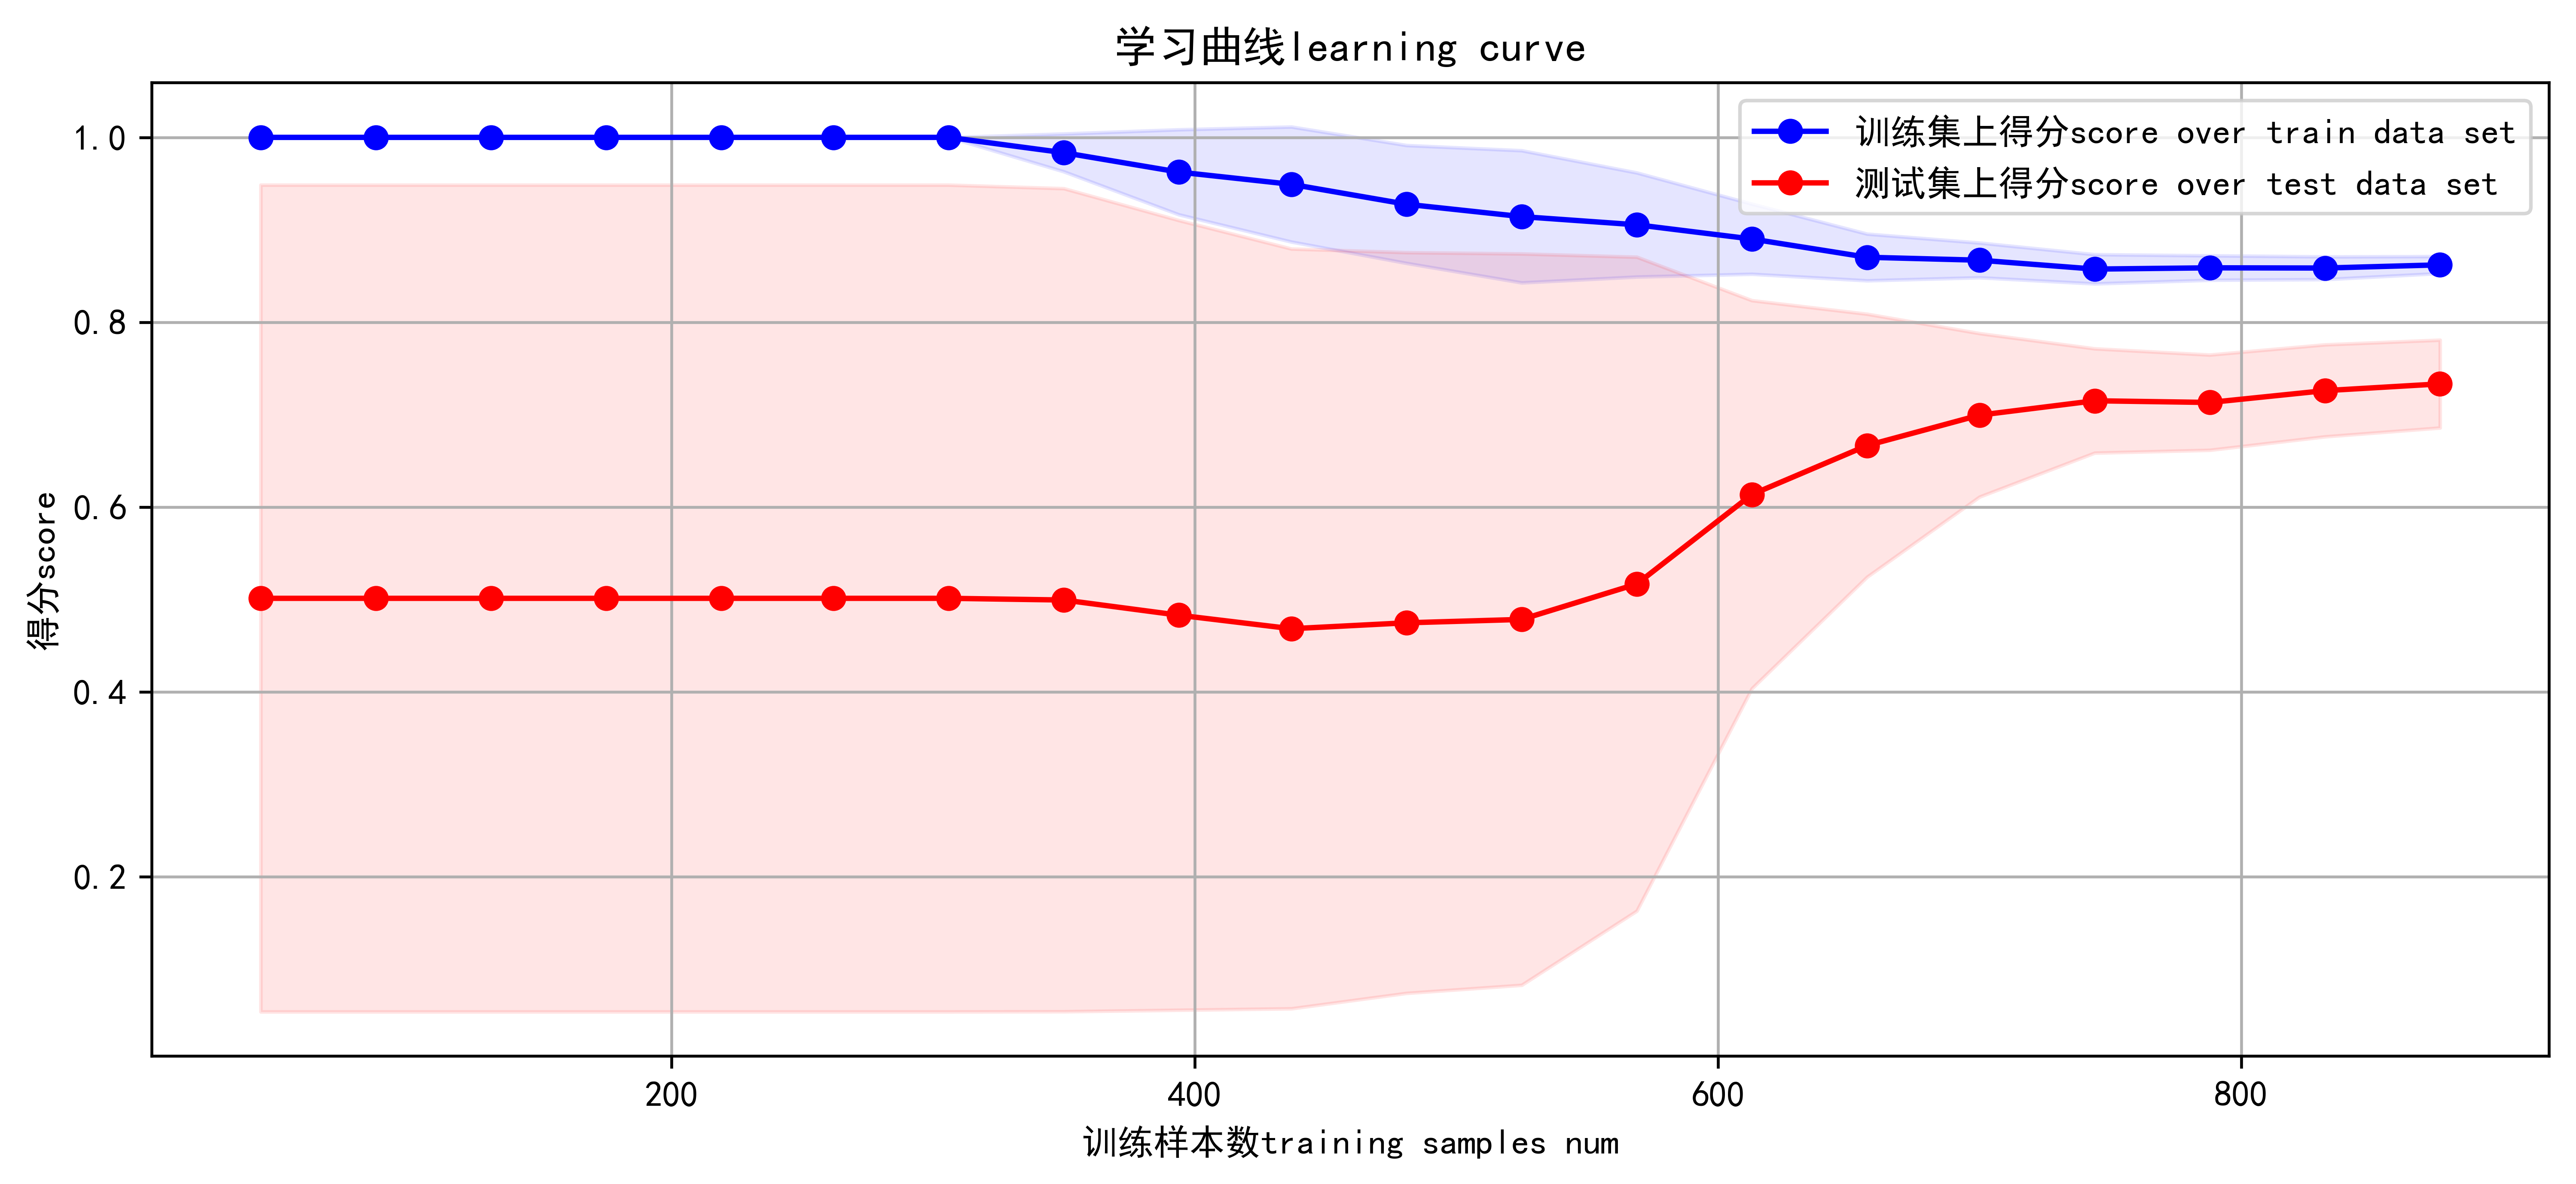

最终训练集和测试集准确率的均值为 77.86%, 最大差值为：18.55%


In [567]:
X = data_train_balanced.as_matrix()
y = label_train.as_matrix()
knn = KNeighborsClassifier(n_neighbors=5)
midpoint, diff = plot_learning_curve(knn, u"学习曲线learning curve", X, y,cv=5)
print('最终训练集和测试集准确率的均值为 {:.2f}%, 最大差值为：{:.2f}%'.format(midpoint*100, diff*100))

2. 随机森林

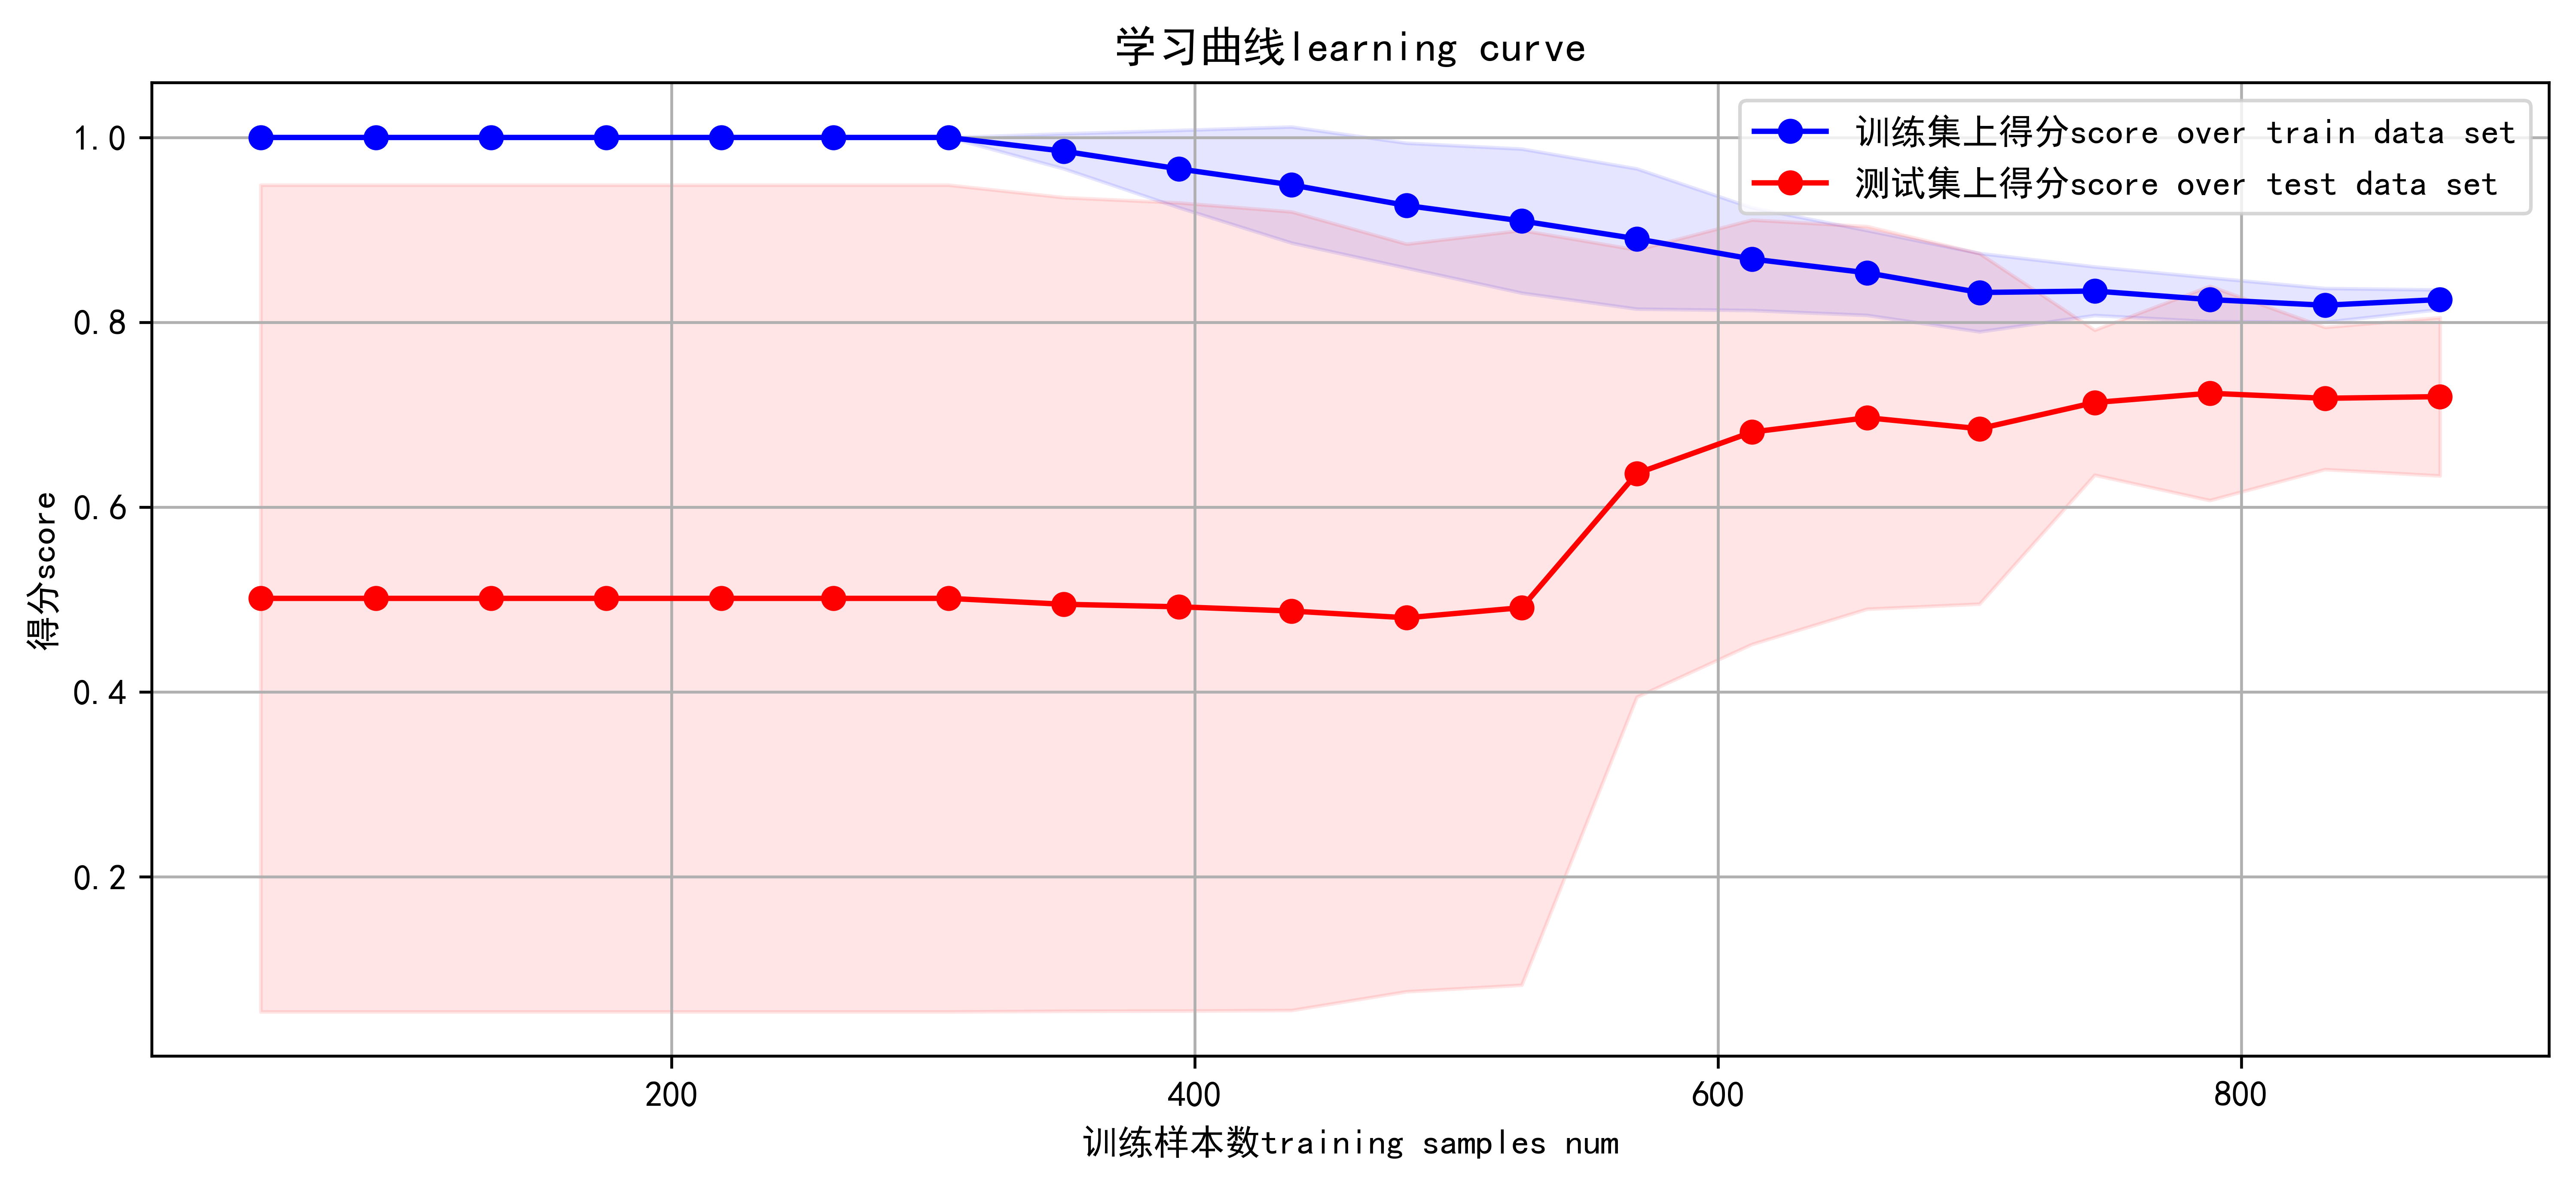

最终训练集和测试集准确率的均值为 73.46%, 最大差值为：20.12%


In [568]:
X = data_train_balanced.as_matrix()
y = label_train.as_matrix()
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
midpoint, diff = plot_learning_curve(clf, u"学习曲线learning curve", X, y,cv=5)
print('最终训练集和测试集准确率的均值为 {:.2f}%, 最大差值为：{:.2f}%'.format(midpoint*100, diff*100))

>结论：将标签均衡化的结果并不是很理想，由于添加的假数据，导致准确率下降了不少，影响最大就是最大差值，说明过拟合情况变得严重了